### Problem Statement: Developing an Automated Health Insurance Cost Prediction System for a Medical Company

#### Context and Company Vision:

* The healthcare industry is undergoing significant changes and advancements.
* Our medical company aims to improve operational efficiency and customer experience.
* We plan to achieve this by implementing an advanced automation system.

#### Primary Objective:

* Develop a predictive model capable of accurately estimating health insurance costs.
* The focus is on individual policyholders, tailoring predictions to their specific circumstances.

#### Work Flow


* **Data Collection**
* **Data Preprocessing**
* **Feature Engineering**
* **Data Splitting and Validation**
* **Model Training**
* **Model Evaluation**

### Importing Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

### Data Collection and Analysis

In [2]:
insurance_data = pd.read_csv('insurance.csv')
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
insurance_data.shape #rows and columns

(1338, 7)

In [4]:
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
insurance_data.isnull().sum() #checking for missing values presence

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
#statistical analysis of data
insurance_data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
import warnings
from sklearn.exceptions import ConvergenceWarning

warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=ConvergenceWarning)


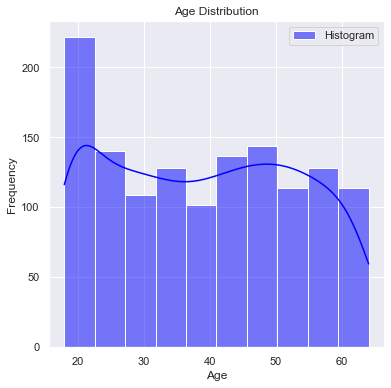

In [18]:
sns.set()
plt.figure(figsize=(6, 6))
age_data = insurance_data['age']
# Create histogram
sns.histplot(data=age_data, bins=10, kde=True, color='blue', label='Histogram')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.show()

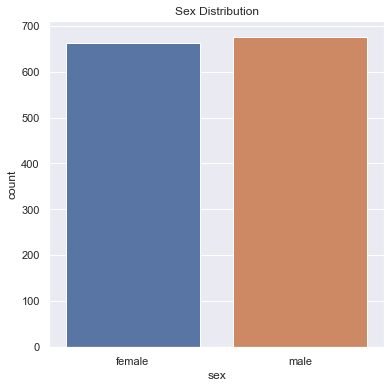

In [22]:
plt.figure(figsize=(6, 6))
sns.countplot(x='sex', data=insurance_data)
plt.title('Sex Distribution')
plt.show()

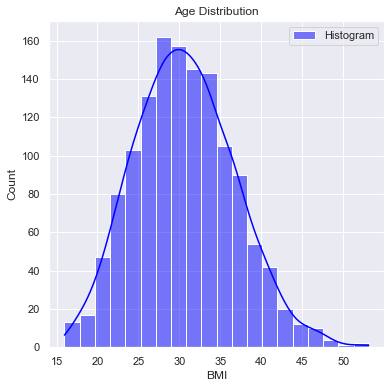

In [26]:
sns.set()
plt.figure(figsize=(6, 6))
age_data = insurance_data['bmi']
# Create histogram
sns.histplot(data=age_data, bins=20, kde=True, color='blue', label='Histogram')
plt.title('Age Distribution')
plt.xlabel('BMI')
plt.ylabel('Count')
plt.legend()
plt.show()

#### Normal BMI --> 18.5 to 24.9
##### Lot of people having BMI More than 24.9 , that affects their health premium

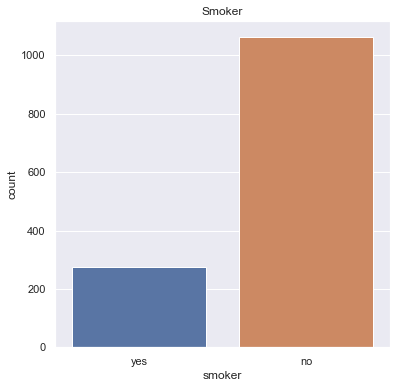

In [27]:
plt.figure(figsize=(6, 6))
sns.countplot(x='smoker', data=insurance_data)
plt.title('Smoker')
plt.show()

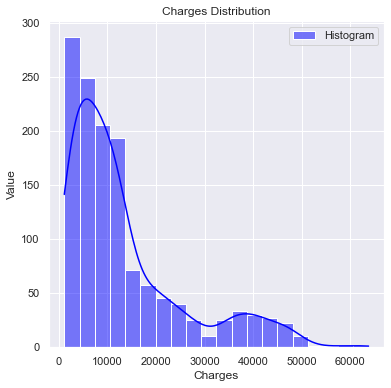

In [28]:
#Charges Distribution
sns.set()
plt.figure(figsize=(6, 6))
age_data = insurance_data['charges']
# Create histogram
sns.histplot(data=age_data, bins=20, kde=True, color='blue', label='Histogram')
plt.title('Charges Distribution')
plt.xlabel('Charges')
plt.ylabel('Value')
plt.legend()
plt.show()

### Encoding Categorical Columns

In [29]:
insurance_data.replace({'sex':{'male':0, 'female':1}}, inplace = True)
insurance_data.replace({'smoker':{'yes':0, 'no':1}}, inplace = True)
insurance_data.replace({'region':{'southeast':0, 'southwest':1, 'northeast':2, 'northwest' : 3}}, inplace = True)

In [30]:
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520


#### Splitting Features and Target

In [31]:
X = insurance_data.drop(columns='charges', axis = 1)
y = insurance_data['charges']

In [32]:
X

,age,sex,bmi,children,smoker,region
0,19,1,27.900,0,0,1
1,18,0,33.770,1,1,0
2,28,0,33.000,3,1,0
3,33,0,22.705,0,1,3
4,32,0,28.880,0,1,3
...,...,...,...,...,...,...
1333,50,0,30.970,3,1,3
1334,18,1,31.920,0,1,2
1335,18,1,36.850,0,1,0
1336,21,1,25.800,0,1,1


In [33]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

### Splitting data into train and test

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

### Model Training

In [36]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

### Model Evaluation

In [37]:
training_data_prediction  = regressor.predict(X_train)

In [38]:
# R Squared Value
r2_train = metrics.r2_score(y_train, training_data_prediction)
print(r2_train)

0.751505643411174


In [39]:
insurance_data.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,0,30.97,3,1,3,10600.5483
1334,18,1,31.92,0,1,2,2205.9808
1335,18,1,36.85,0,1,0,1629.8335
1336,21,1,25.80,0,1,1,2007.9450
1337,61,1,29.07,0,0,3,29141.3603


  ### Building a predictive System

In [46]:
input_data = (20, 1, 36.85, 0, 1, 2)
# Convert the tuple to a NumPy array
data_array = np.asarray(input_data)
# Reshape the array
reshaped_array = data_array.reshape(1, -1)  # Reshape into a 1*1 array
prediction = regressor.predict(reshaped_array)
prediction


array([5092.55027764])